<h1 style='color:white; background:black; border:0'><center>How is Data Science on Reddit?</center></h1>

![](https://storage.googleapis.com/kaggle-datasets-images/1226967/2048152/b7b21a6c2113257ec9ddf7221abfed1a/dataset-cover.png?t=2021-03-23-12-43-24)

**Data Science Community on Reddit is growing every year. Today, the network is a platform for many professionals and enthusiasts who share valuable materials and experiences. Quite an interesting task is the analysis of posts dedicated to Data Science:**
- **finding interesting topics**, 
- **studying changes in trends over time**, 
- **predicting the potential popularity of posts on Reddit by its title and text**, etc.

**Over time, I will increase the size of this dataset by adding posts from other subreddits, so that the quality of the analysis will improve.**

<h3 style='color:white; background:black; border:0'><center>This dataset includes over 500,000 posts from 19 Date Science subreddits:</center></h3>

[r/analytics](https://www.reddit.com/r/analytics/), [r/deeplearning](https://www.reddit.com/r/deeplearning/), [r/datascience](https://www.reddit.com/r/datascience/), [r/datasets](https://www.reddit.com/r/datasets/), [r/kaggle](https://www.reddit.com/r/kaggle/), [r/learnmachinelearning](https://www.reddit.com/r/learnmachinelearning/), [r/MachineLearning](https://www.reddit.com/r/MachineLearning/), [r/statistics](https://www.reddit.com/r/statistics/), [r/artificial](https://www.reddit.com/r/artificial/), [r/AskStatistics](https://www.reddit.com/r/AskStatistics/), [r/computerscience](https://www.reddit.com/r/computerscience/), [r/computervision](https://www.reddit.com/r/computervision/), [r/dataanalysis](https://www.reddit.com/r/dataanalysis/), [r/dataengineering](https://www.reddit.com/r/dataengineering/), [r/DataScienceJobs](https://www.reddit.com/r/DataScienceJobs/), [r/datascienceproject](https://www.reddit.com/r/datascienceproject/), [r/data](https://www.reddit.com/r/data/), [r/MLQuestions](https://www.reddit.com/r/MLQuestions/), [r/rstats](https://www.reddit.com/r/rstats/)

Data were collected from [pushshift.io API](https://pushshift.io) (maintained by Jason Baumgartner).

<h3 style='color:white; background:black; border:0'><center>19 datasets (one per one subreddit) include the following data:</center></h3>

`#` - row index;
`created_date` - post publication date;
`created_timestamp` - post publication timestamp;
`subreddit` - subreddit name;
`title` - post title;
`id` - unique operation id;
`author` - post author;
`author_created_utc` - author registration date;
`full_link` - hyperlink to post;
`score` - ratio of likes and dislikes;
`num_comments` - the number of comments;
`num_crossposts` - the number of crossposts; 
`subreddit_subscribers` - the number of subreddit subscribers at the time the post was published;
`post` - post text.

# If you are interested, see [this dataset (Reddit Data Science Posts)](https://www.kaggle.com/maksymshkliarevskyi/reddit-data-science-posts).
Feel free to leave your comments on this notebook. I will try to make dataset better and much larger.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import tqdm
from tqdm.auto import tqdm as tqdmp
tqdmp.pandas()

# NLP
import unicodedata, string, re, os
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.dates as mdates

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

# Some settings for visualizations
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 
            'xtick.color': 'white', 'ytick.color': 'white', 
            'grid.color': 'white', 'axes.labelcolor': 'white',
            'figure.dpi': 150, 'grid.linestyle': ':', 'grid.alpha': .6,
            'font.family': 'fantasy'})

In [2]:
WORK_DIR = '../input/reddit-data-science-posts/'
all_data = pd.DataFrame()

for dataset in os.listdir(WORK_DIR):
    all_data = pd.concat([all_data, pd.read_csv(WORK_DIR + dataset, index_col = 0)])
    
all_data = all_data.reset_index(drop = True)
all_data['created_date'] = all_data['created_date'].astype('datetime64')
all_data

created_date  created_timestamp        subreddit  \
0      2011-08-08 13:44:30       1.312800e+09      datascience   
1      2011-08-21 00:49:53       1.313877e+09      datascience   
2      2011-08-30 09:38:41       1.314686e+09      datascience   
3      2011-09-10 16:06:01       1.315660e+09      datascience   
4      2011-09-22 11:12:23       1.316679e+09      datascience   
...                    ...                ...              ...   
499138 2021-03-17 18:06:51       1.615997e+09  MachineLearning   
499139 2021-03-17 18:24:28       1.615998e+09  MachineLearning   
499140 2021-03-17 18:28:03       1.615998e+09  MachineLearning   
499141 2021-03-17 18:30:16       1.615999e+09  MachineLearning   
499142 2021-03-17 18:46:57       1.616000e+09  MachineLearning   

                                                    title      id      author  \
0       How Social Network Analysis Solves Real World ...   jcaj9    mhermans   
1       An in-depth analysis of what data scienceis ? ...   jp5a3      ch00ey   
2                                   What is Data Science?   jytjm   [deleted]   
3       A programmatic data processing API on top of G...   kb3hb    mhermans   
4                  A Graph-Based Movie Recommender Engine   knps1    mhermans   
...                                                   ...     ...         ...   
499138  [P] My side project: Cloud GPUs for 1/3 the co...  m73sy7    xepo3abp   
499139  Towards the end of deep learning and the begin...  m747bm  javismiles   
499140  Supercharge your NLP project with a free, self...  m74a8t     surgeai   
499141  [P] Supercharge your NLP project with a free, ...  m74c0l     surgeai   
499142                               [P] Predict function  m74phg     Suzzy67   

        author_created_utc                                          full_link  \
0             1.169219e+09  https://www.reddit.com/r/datascience/comments/...   
1             1.310443e+09  https://www.reddit.com/r/datascience/comments/...   
2                      NaN  https://www.reddit.com/r/datascience/comments/...   
3             1.169219e+09  https://www.reddit.com/r/datascience/comments/...   
4             1.169219e+09  https://www.reddit.com/r/datascience/comments/...   
...                    ...                                                ...   
499138                 NaN  https://www.reddit.com/r/MachineLearning/comme...   
499139                 NaN  https://www.reddit.com/r/MachineLearning/comme...   
499140                 NaN  https://www.reddit.com/r/MachineLearning/comme...   
499141                 NaN  https://www.reddit.com/r/MachineLearning/comme...   
499142                 NaN  https://www.reddit.com/r/MachineLearning/comme...   

        score  num_comments  num_crossposts  subreddit_subscribers  \
0         3.0           0.0             NaN                    NaN   
1         3.0           0.0             NaN                    NaN   
2         1.0           0.0             NaN                    NaN   
3         1.0           0.0             NaN                    NaN   
4         1.0           0.0             NaN                    NaN   
...       ...           ...             ...                    ...   
499138    1.0           3.0             0.0              1751567.0   
499139    1.0           2.0             0.0              1751591.0   
499140    1.0           2.0             0.0              1751592.0   
499141    1.0           0.0             0.0              1751596.0   
499142    1.0           0.0             0.0              1751614.0   

                                                     post  
0                                                     NaN  
1                                                     NaN  
2                                                     NaN  
3                                                     NaN  
4                                                     NaN  
...                                                   ...  
499138  Some o

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499143 entries, 0 to 499142
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   created_date           499143 non-null  datetime64[ns]
 1   created_timestamp      499143 non-null  float64       
 2   subreddit              499143 non-null  object        
 3   title                  499143 non-null  object        
 4   id                     499143 non-null  object        
 5   author                 499143 non-null  object        
 6   author_created_utc     103319 non-null  float64       
 7   full_link              499143 non-null  object        
 8   score                  499143 non-null  float64       
 9   num_comments           499143 non-null  float64       
 10  num_crossposts         371510 non-null  float64       
 11  subreddit_subscribers  335876 non-null  float64       
 12  post                   247383 non-null  obje

In total, we have 499 142 posts. Of these, 247 383 have text body. The half is empty because it was either originally without text, or has been removed from the platform.

In [4]:
all_data.describe()

created_timestamp  author_created_utc          score   num_comments  \
count       4.991430e+05        1.033190e+05  499143.000000  499143.000000   
mean        1.537440e+09        1.385348e+09       4.874707       3.992559   
std         6.543569e+07        8.068633e+07      27.524944      12.309334   
min         1.205914e+09        1.118030e+09       0.000000      -1.000000   
25%         1.500864e+09        1.336142e+09       1.000000       0.000000   
50%         1.554320e+09        1.402415e+09       1.000000       1.000000   
75%         1.589539e+09        1.450187e+09       2.000000       4.000000   
max         1.616001e+09        1.550408e+09    8331.000000    2927.000000   

       num_crossposts  subreddit_subscribers  
count   371510.000000           3.358760e+05  
mean         0.006315           2.607430e+05  
std          0.106796           3.795952e+05  
min          0.000000           0.000000e+00  
25%          0.000000           3.933200e+04  
50%          0.000000           9.953050e+04  
75%          0.000000           2.446072e+05  
max         23.000000           1.751614e+06

# Let's take a look at some interesting data

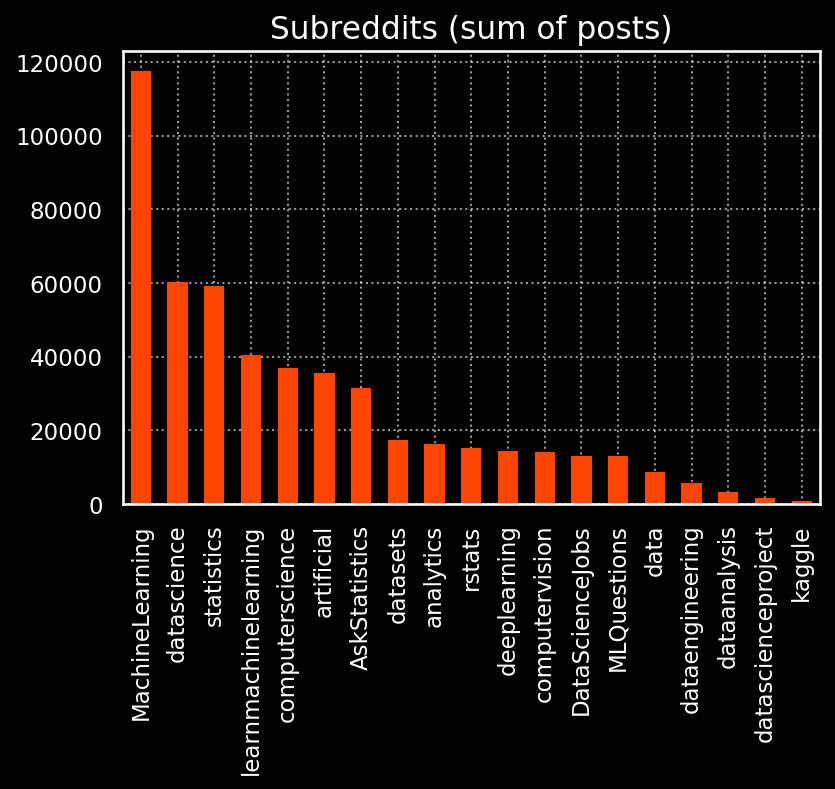

In [5]:
plt.title('Subreddits (sum of posts)', color = 'white', size = 15)
sub_redd = all_data.groupby(all_data["subreddit"]).created_date.count().sort_values(ascending = False)
sub_redd.plot(kind = "bar", edgecolor = '#ff4501', color = '#ff4501')
plt.xlabel('')
plt.show()

The r/MachineLearning subreddit has the largest number of posts. The smallest is r/kaggle (it is necessary to promote the kaggle community on Reddit!).

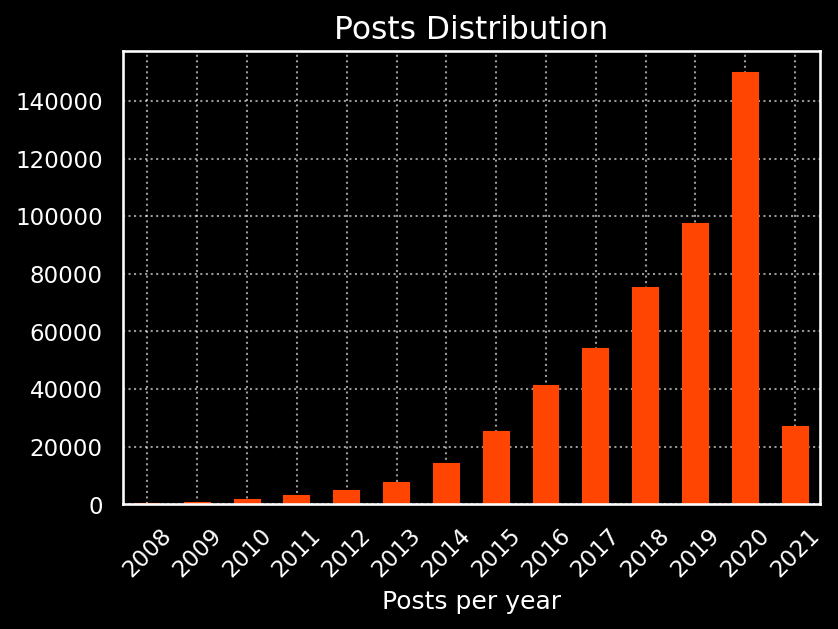

In [6]:
plt.title('Posts Distribution', color = 'white', size = 15)
year_d = all_data.groupby(all_data["created_date"].dt.year).created_date.count()
year_d.plot(kind = "bar", edgecolor = '#ff4501', color = '#ff4501')
plt.xlabel('Posts per year')
plt.xticks(rotation = 45)
plt.show()

Visual confirmation that the Data Science community on Reddit is growing.

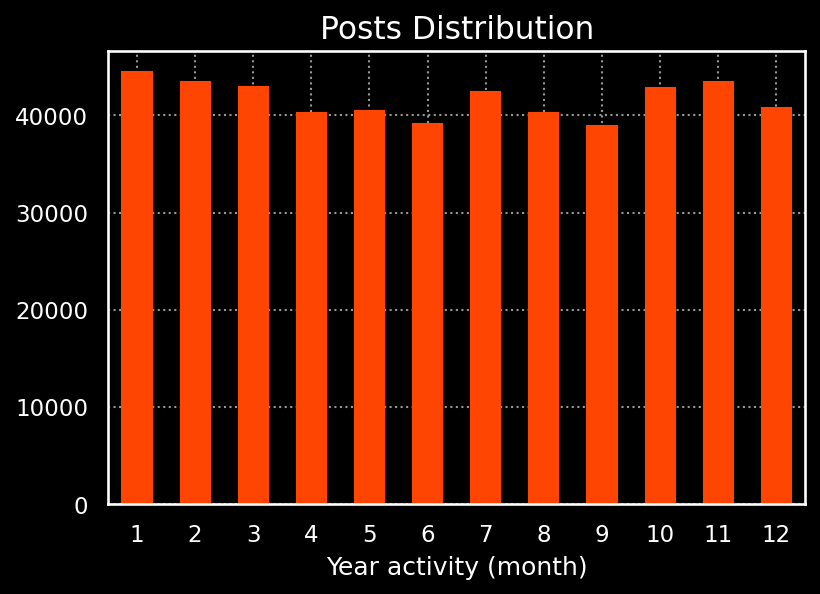

In [7]:
plt.title('Posts Distribution', color = 'white', size = 15)
month_d = all_data.groupby(all_data["created_date"].dt.month).created_date.count()
month_d.plot(kind = "bar", edgecolor = '#ff4501', color = '#ff4501')
plt.xlabel('Year activity (month)')
plt.xticks(rotation = 'horizontal')
plt.show()

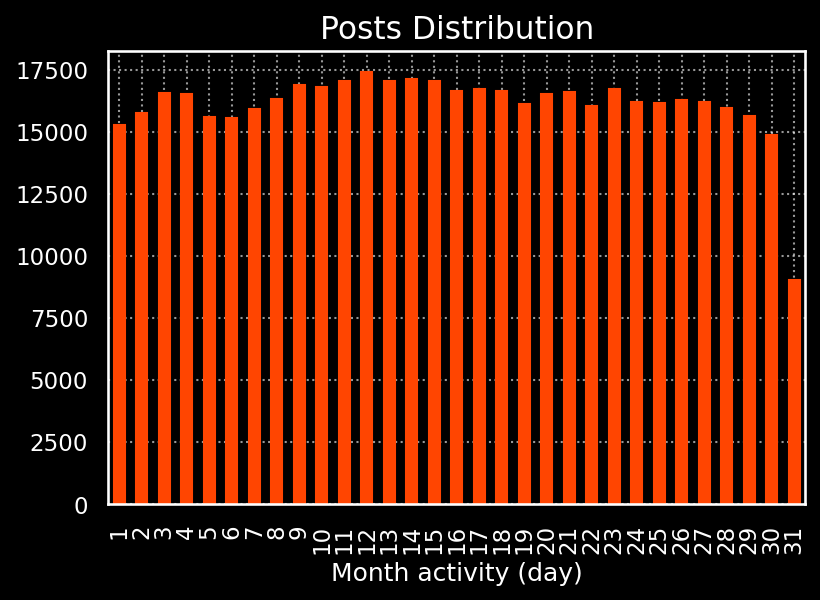

In [8]:
plt.title('Posts Distribution', color = 'white', size = 15)
day_d = all_data.groupby(all_data["created_date"].dt.day).created_date.count()
day_d.plot(kind = "bar", edgecolor = '#ff4501', color = '#ff4501')
plt.xlabel('Month activity (day)')
plt.show()

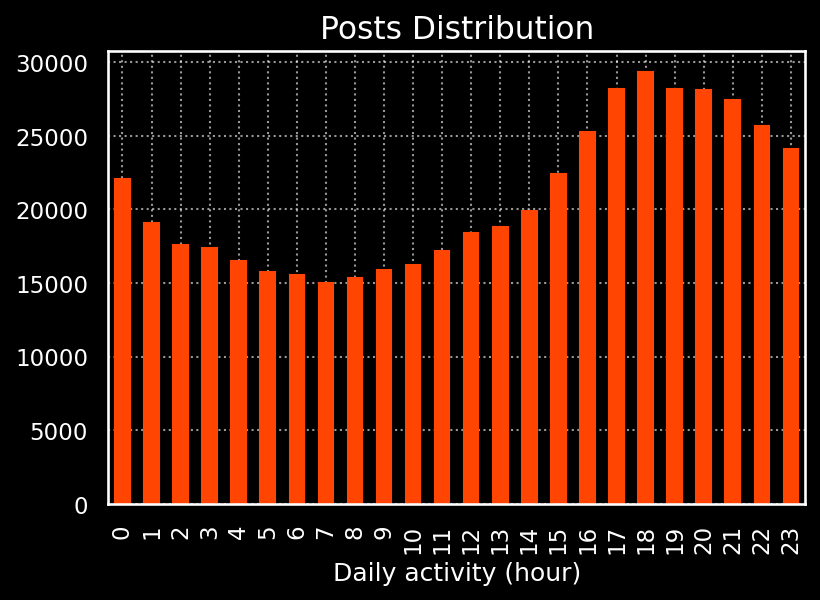

In [9]:
plt.title('Posts Distribution', color = 'white', size = 15)
hour_d = all_data.groupby(all_data["created_date"].dt.hour).created_date.count()
hour_d.plot(kind = "bar", edgecolor = '#ff4501', color = '#ff4501')
plt.xlabel('Daily activity (hour)')
plt.show()

There are no patterns in activity between months, and days of the month. Activity within a day is logically higher in the evening and at night.

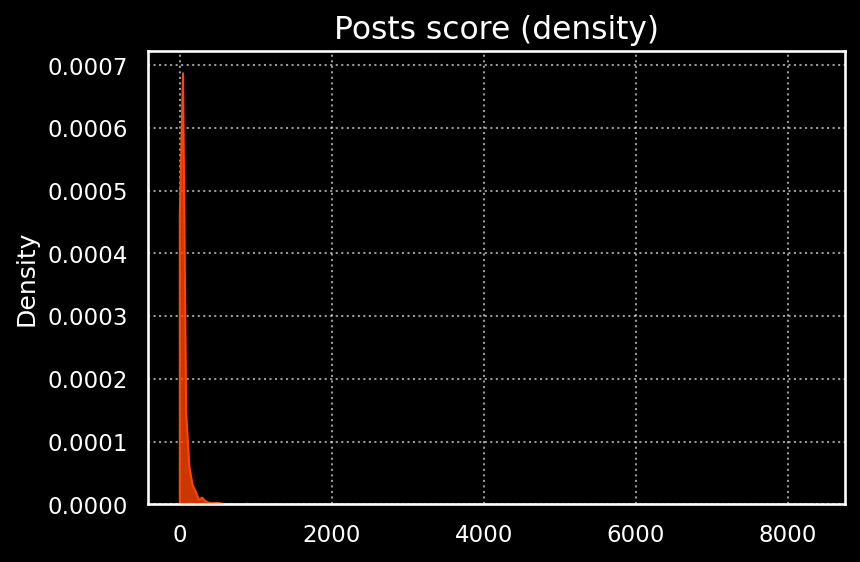

In [10]:
plt.title('Posts score (density)', color = 'white', size = 15)
sns.kdeplot(all_data['score'], color = '#ff4501', shade = True, 
            alpha = .8, legend = None)
plt.xlabel('')
plt.show()

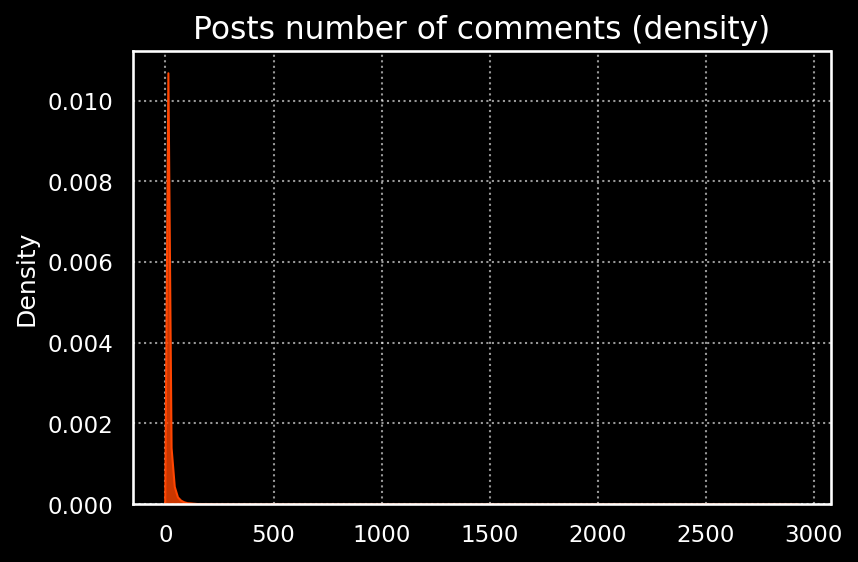

In [11]:
plt.title('Posts number of comments (density)', color = 'white', size = 15)
sns.kdeplot(all_data['num_comments'], color = '#ff4501', shade = True, 
            alpha = .8, legend = None)
plt.xlabel('')
plt.show()

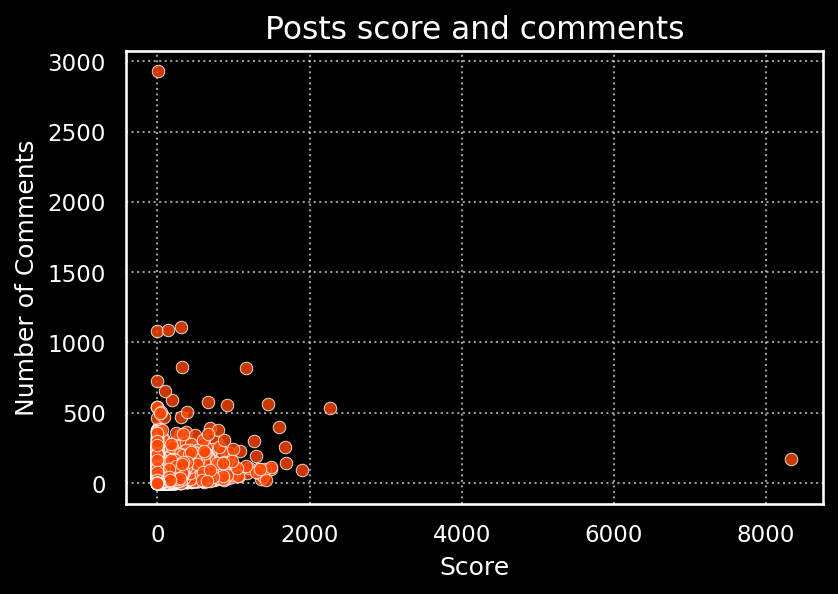

In [12]:
plt.title('Posts score and comments', color = 'white', size = 15)
sns.scatterplot(all_data['score'], all_data['num_comments'], 
                color = '#ff4501', alpha = .8, legend = None)
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.show()

The ratio between post rating and the number of comments is not so linear. There are posts with a huge number of likes, but almost no comments, and vice versa.

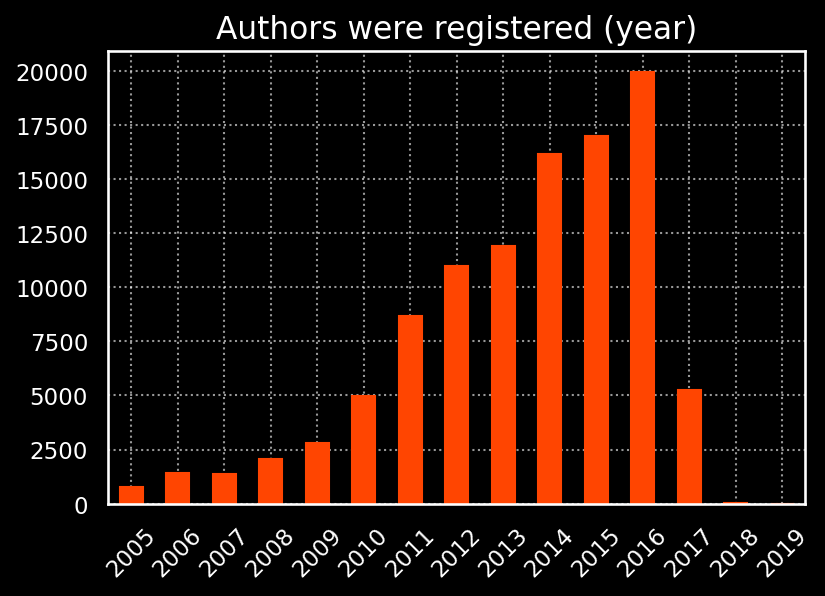

In [13]:
plt.title('Authors were registered (year)', color = 'white', size = 15)
all_data['author_created_utc'].dropna() \
    .apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')) \
    .astype('datetime64').dt.year.value_counts(sort = False) \
    .plot(kind = "bar", edgecolor = '#ff4501', color = '#ff4501')
plt.xticks(rotation = 45)
plt.show()

In the dynamics of authors' registration date, there is a regular increase. True, something has happened in recent years. This is most likely due to the data provided by "pushshift.io".

**Let's take a closer look at text data.**

In [14]:
# Necessary functions
def text_cleaner(text):
    """
    Function for clearing text data from unnecessary characters.
    """
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\r', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def show_wordcloud(data, stop, mask = None, title = None, color = 'black'):
    """
    Function for creating wordclouds (with or without mask)
    """
    from wordcloud import WordCloud, ImageColorGenerator
    wordcloud = WordCloud(background_color = color,
                         stopwords = stop,
                         mask = mask,
                         max_words = 100,
                         scale = 3,
                         width = 4000, 
                         height = 2000,
                         collocations = False,
                         random_state = 1)
    
    wordcloud = wordcloud.generate(data)
    
    plt.figure(1, figsize = (16, 8), dpi = 300)
    plt.title(title, size = 15)
    plt.axis('off')
    if mask is None:
        plt.imshow(wordcloud, interpolation = "bilinear")
        plt.show()
    else:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func = image_colors), 
                   interpolation = "bilinear")
        plt.show()
        
def get_top_ngram(corpus, n = 2):
    """
    Function for creating ngrams of words
    Input: word corpus and n - number of words in grams
    """
    vec = CountVectorizer(stop_words = stop, ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq

In [15]:
title_cleaned = all_data['title'].progress_apply(lambda x: text_cleaner(x))

  0%|          | 0/499143 [00:00<?, ?it/s]

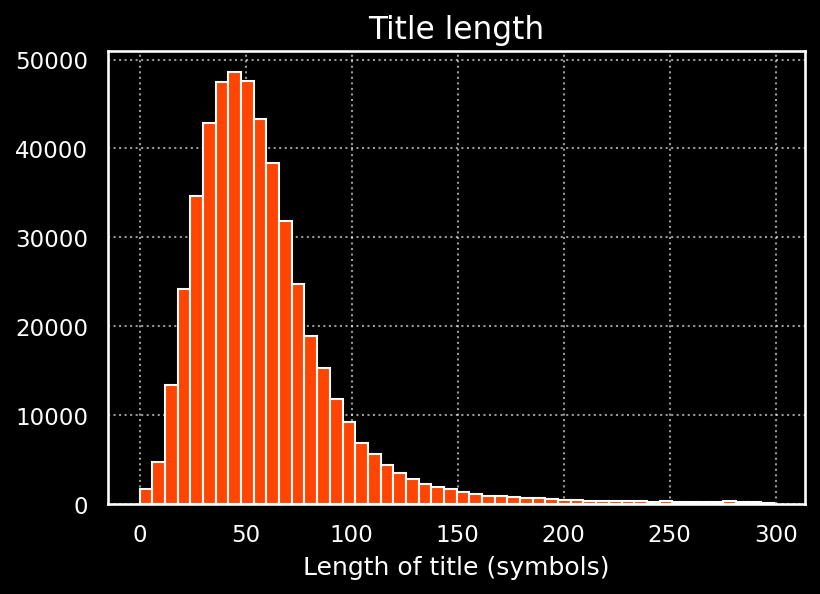

In [16]:
title_length = title_cleaned.str.len()

plt.title('Title length', size = 15, color = 'white')
sns.distplot(title_length, kde = False, color = '#ff4501', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Length of title (symbols)')
plt.show()

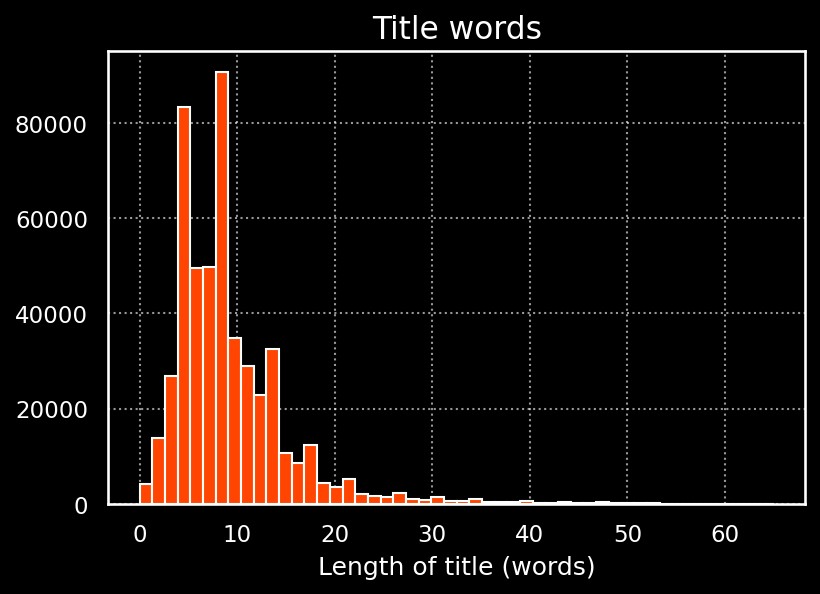

In [17]:
title_words = title_cleaned.str.split().map(lambda x: len(x))

plt.title('Title words', size = 15, color = 'white')
sns.distplot(title_words, kde = False, color = '#ff4501', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Length of title (words)')
plt.show()

Some of the titles are really long! (almost 60 words and 300 characters).

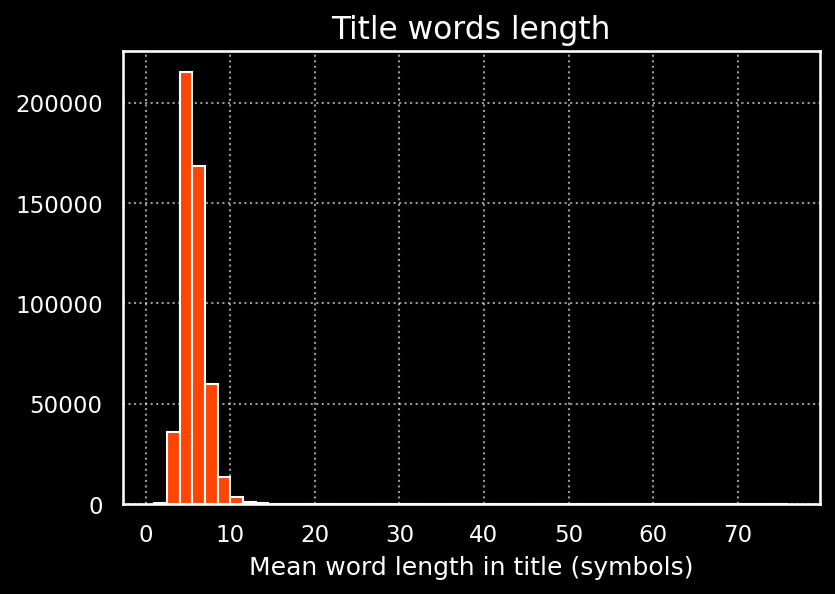

In [18]:
title_word_len = title_cleaned.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

plt.title('Title words length', size = 15, color = 'white')
sns.distplot(title_word_len, kde = False, color = '#ff4501', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Mean word length in title (symbols)')
plt.show()

In [19]:
words = title_cleaned.str.split().values.tolist()
title_corpus = [word for i in words for word in i]

title_counter = Counter(title_corpus)
title_most = title_counter.most_common()

stop = set(stopwords.words('english'))

title_top_words, title_top_words_count = [], []
for word, count in title_most[:100]:
    if word not in stop:
        title_top_words.append(word)
        title_top_words_count.append(count)

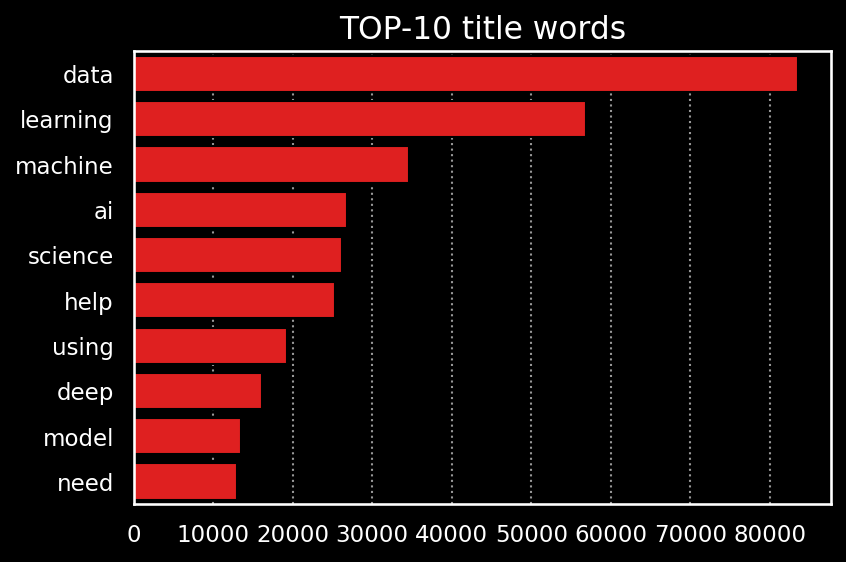

In [20]:
plt.title('TOP-10 title words', color = 'white', size = 15)
sns.barplot(y = title_top_words[:10], x = title_top_words_count[:10], 
            edgecolor = 'black', color = 'red')
plt.show()

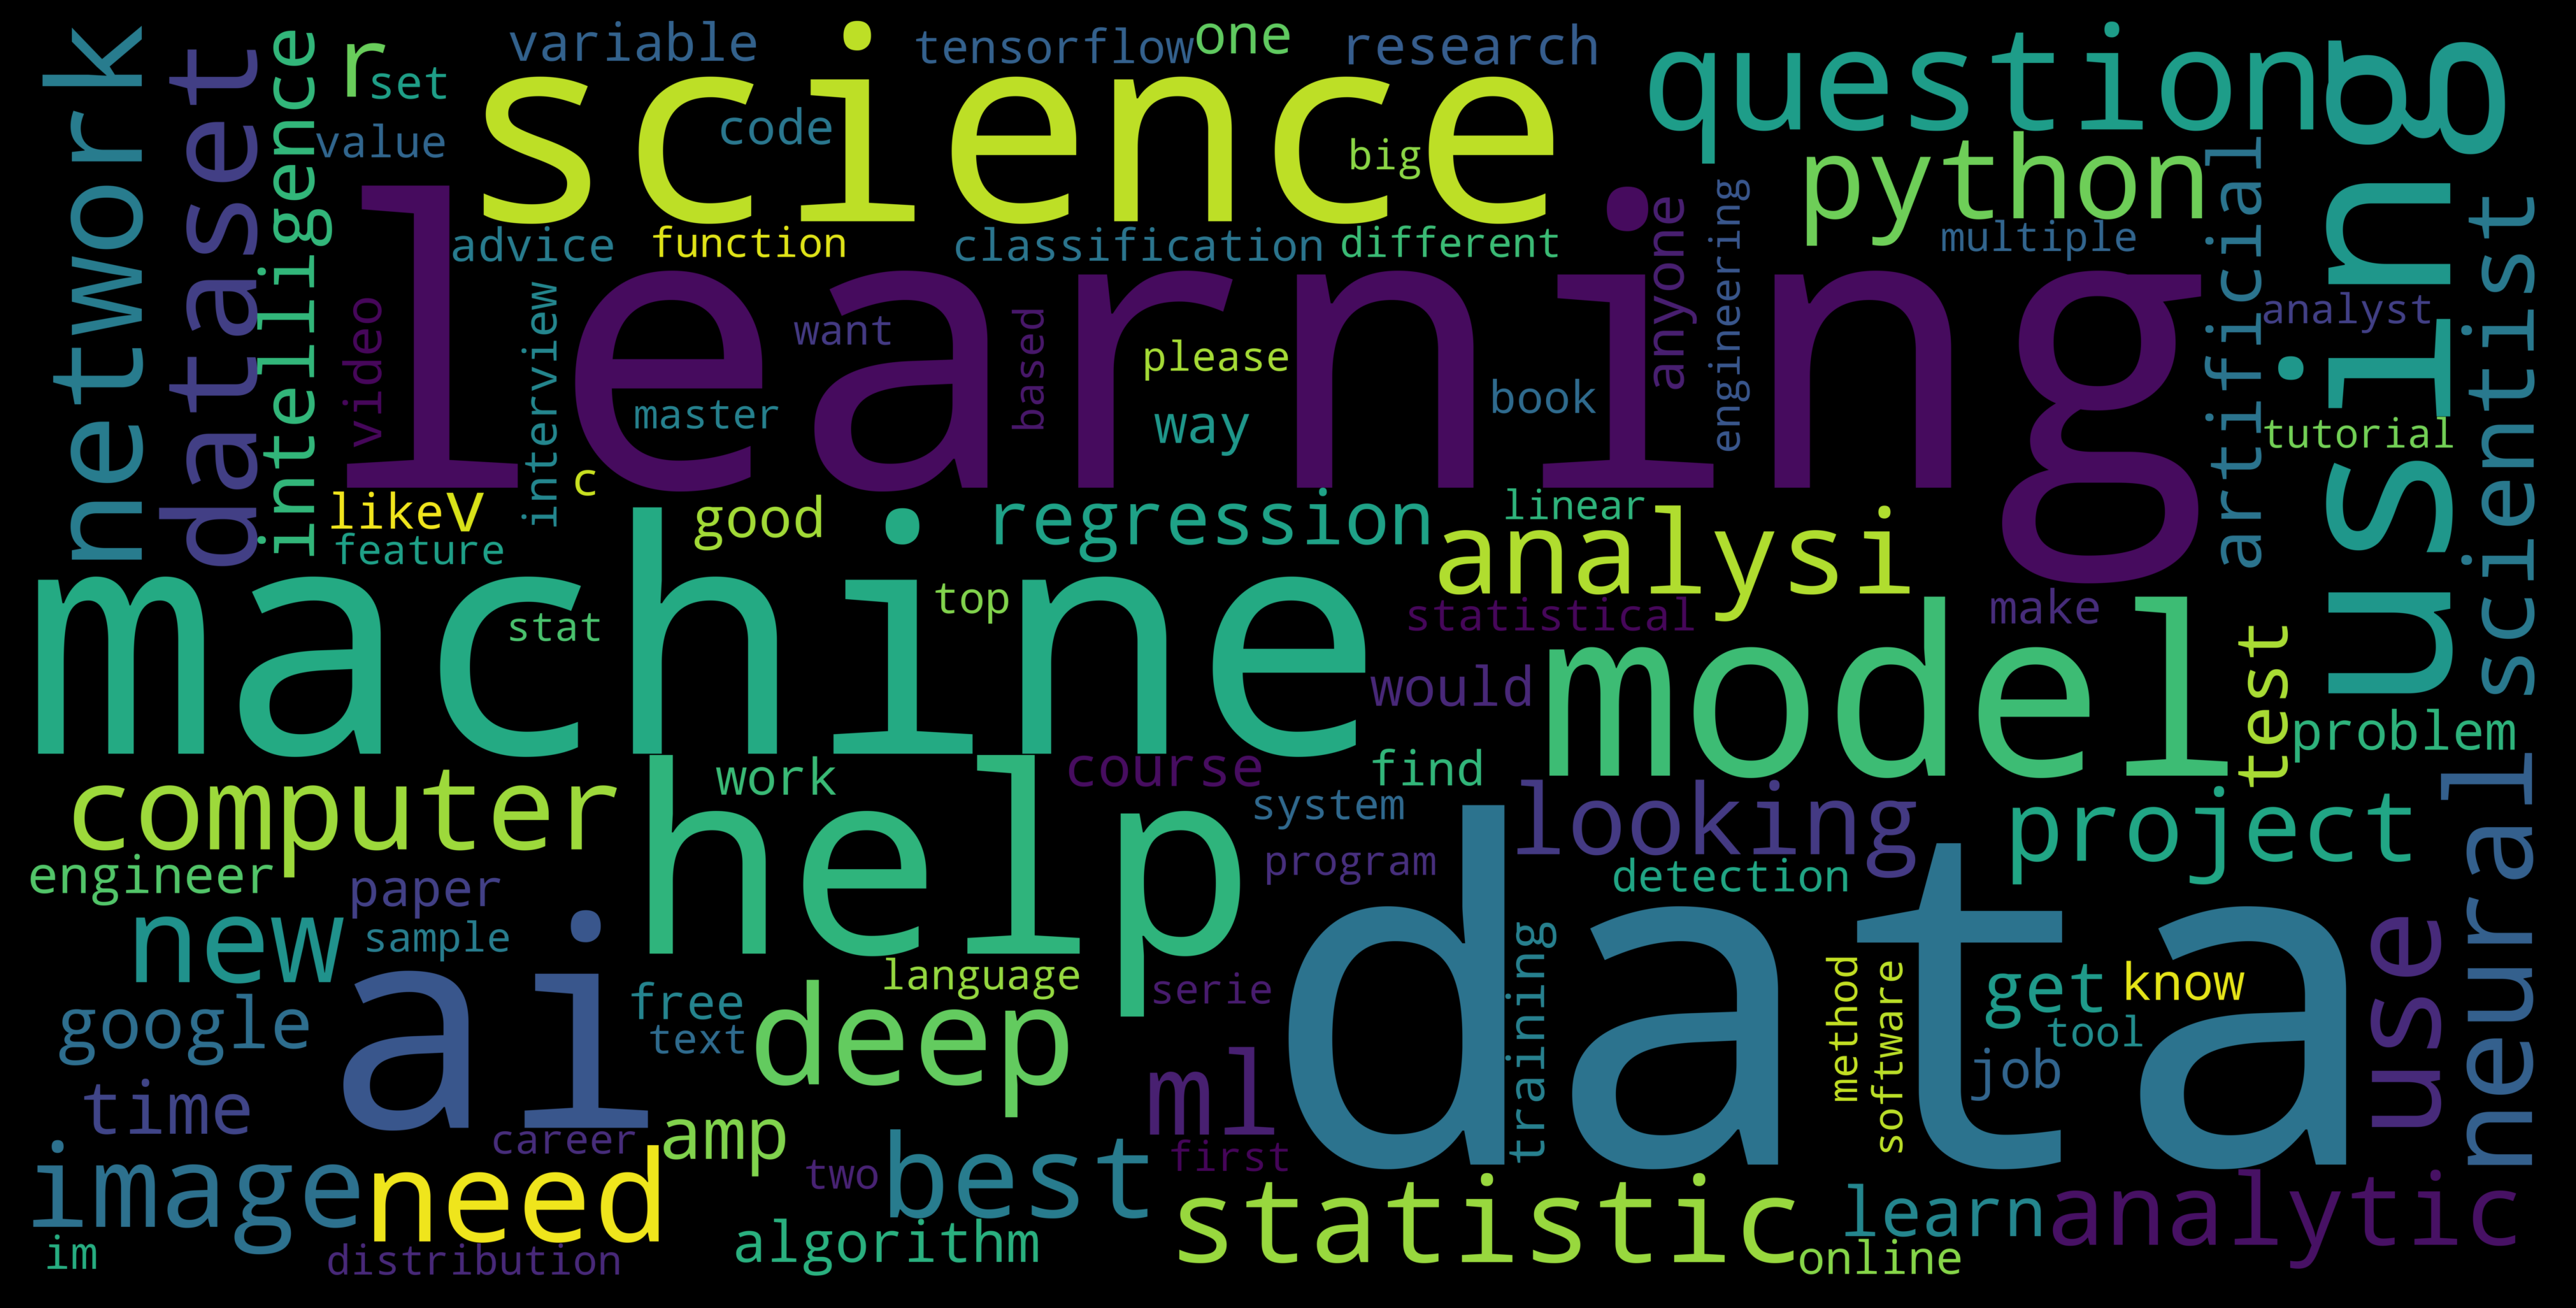

In [21]:
title_word_string = ' '.join(title_corpus)
show_wordcloud(title_word_string, stop)

As expected, the titles are dominated by the words "data", "machine", "learning", "ai", "science", "deep", "model" ...

It is also interesting to look at the bigrams and trigrams of titles.

In [22]:
# Data for bigrams
top_title_bigrams = get_top_ngram(title_cleaned, 2)[:10]
title_x, title_y = map(list, zip(*top_title_bigrams))

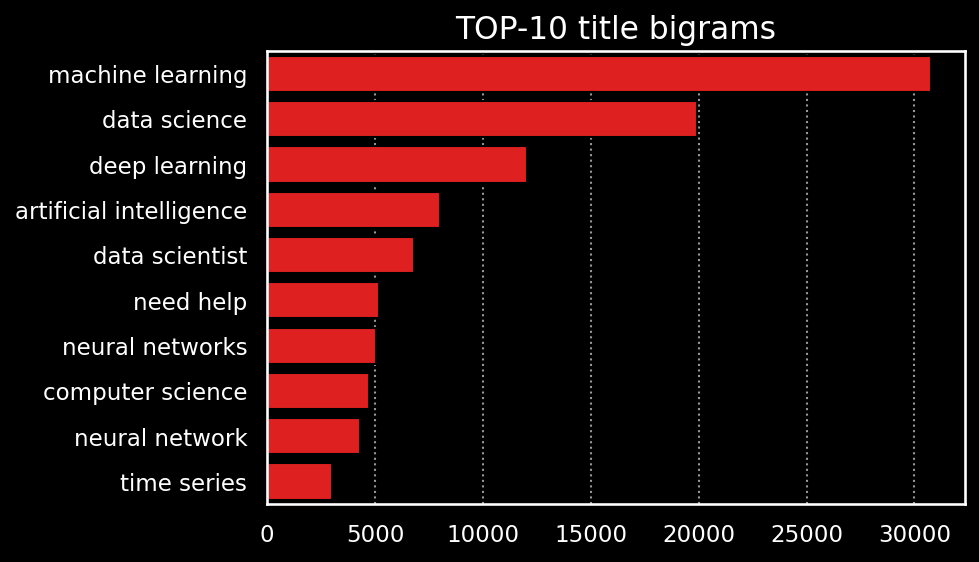

In [23]:
plt.title('TOP-10 title bigrams', color = 'white', size = 15)
sns.barplot(x = title_y, y = title_x, edgecolor = 'black', color = 'red')
plt.show()

In [24]:
# Data for bigrams
top_title_trigrams = get_top_ngram(title_cleaned, 3)[:10]
title_x, title_y = map(list, zip(*top_title_trigrams))

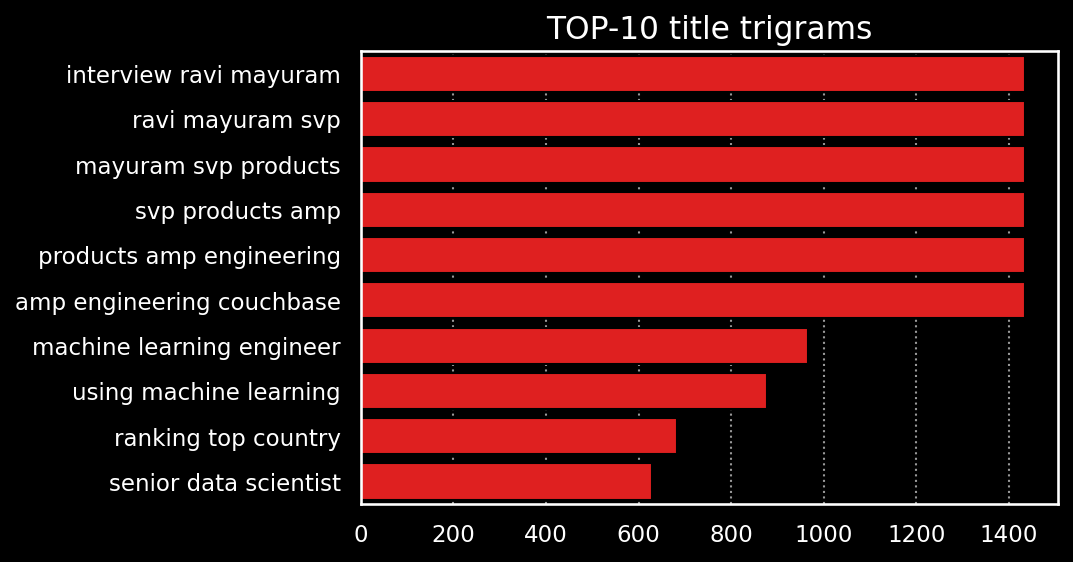

In [25]:
plt.title('TOP-10 title trigrams', color = 'white', size = 15)
sns.barplot(x = title_y, y = title_x, edgecolor = 'black', color = 'red')
plt.show()

### Let's look at the posts data.

In [26]:
post_cleaned = all_data['post'].dropna().progress_apply(lambda x: text_cleaner(x))

  0%|          | 0/247383 [00:00<?, ?it/s]

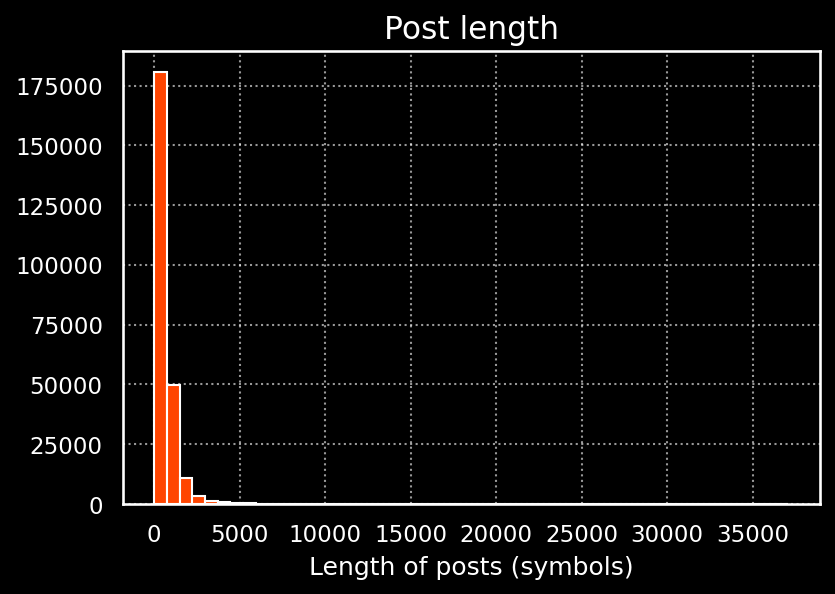

In [27]:
post_length = post_cleaned.str.len()

plt.title('Post length', size = 15, color = 'white')
sns.distplot(post_length, kde = False, color = '#ff4501', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Length of posts (symbols)')
plt.show()

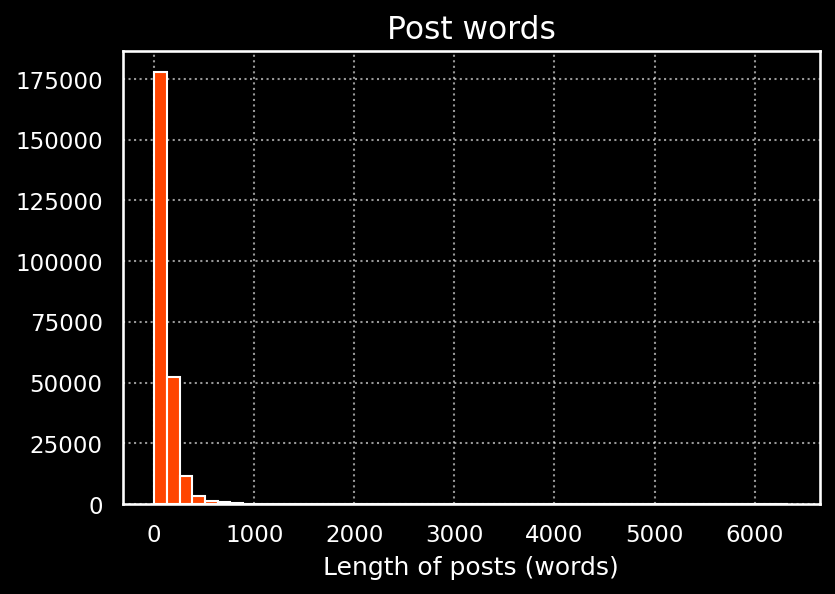

In [28]:
post_words = post_cleaned.str.split().map(lambda x: len(x))

plt.title('Post words', size = 15, color = 'white')
sns.distplot(post_words, kde = False, color = '#ff4501', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Length of posts (words)')
plt.show()

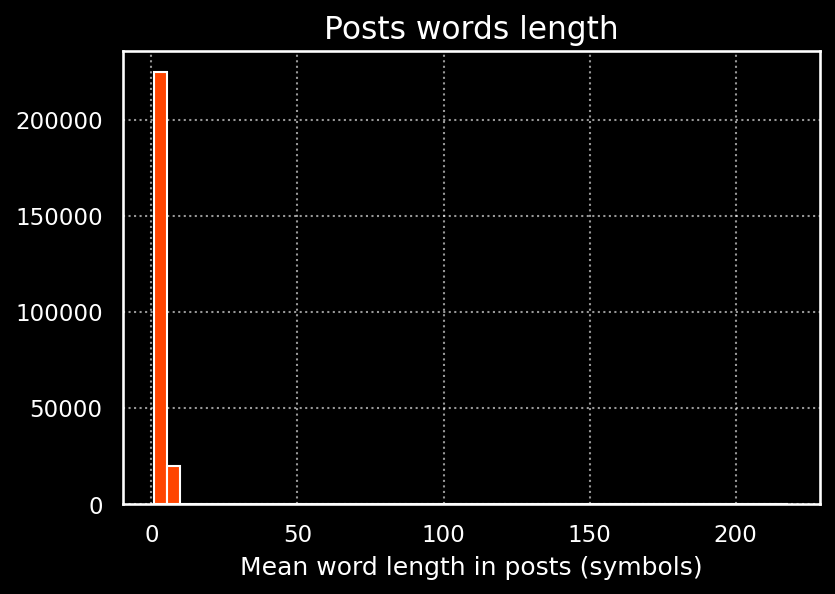

In [29]:
post_word_len = post_cleaned.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

plt.title('Posts words length', size = 15, color = 'white')
sns.distplot(post_word_len, kde = False, color = '#ff4501', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Mean word length in posts (symbols)')
plt.show()

In [30]:
words = post_cleaned.str.split().values.tolist()
post_corpus = [word for i in words for word in i]

post_counter = Counter(post_corpus)
post_most = post_counter.most_common()

stop = set(stopwords.words('english'))

post_top_words, post_top_words_count = [], []
for word, count in post_most[:100]:
    if word not in stop:
        post_top_words.append(word)
        post_top_words_count.append(count)

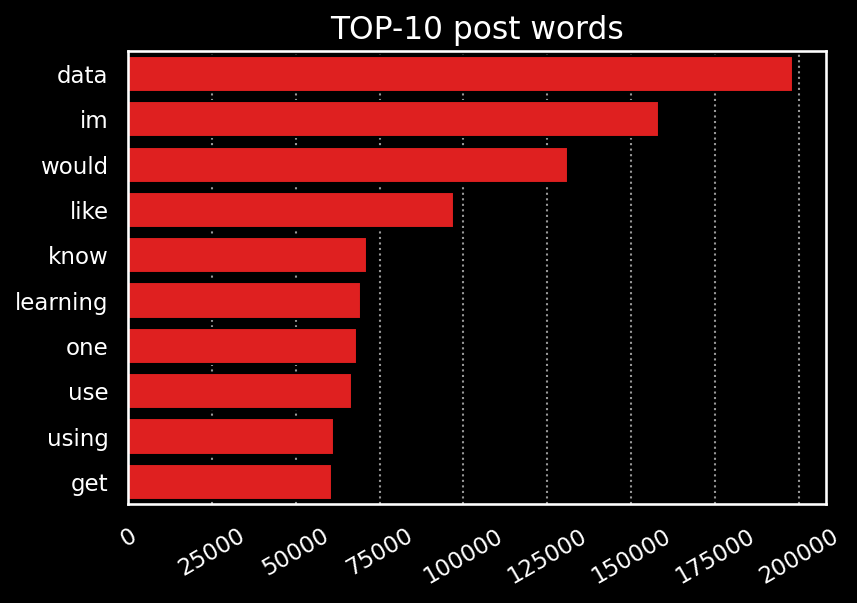

In [31]:
plt.title('TOP-10 post words', color = 'white', size = 15)
sns.barplot(y = post_top_words[:10], x = post_top_words_count[:10], 
            edgecolor = 'black', color = 'red')
plt.xticks(rotation = 30)
plt.show()

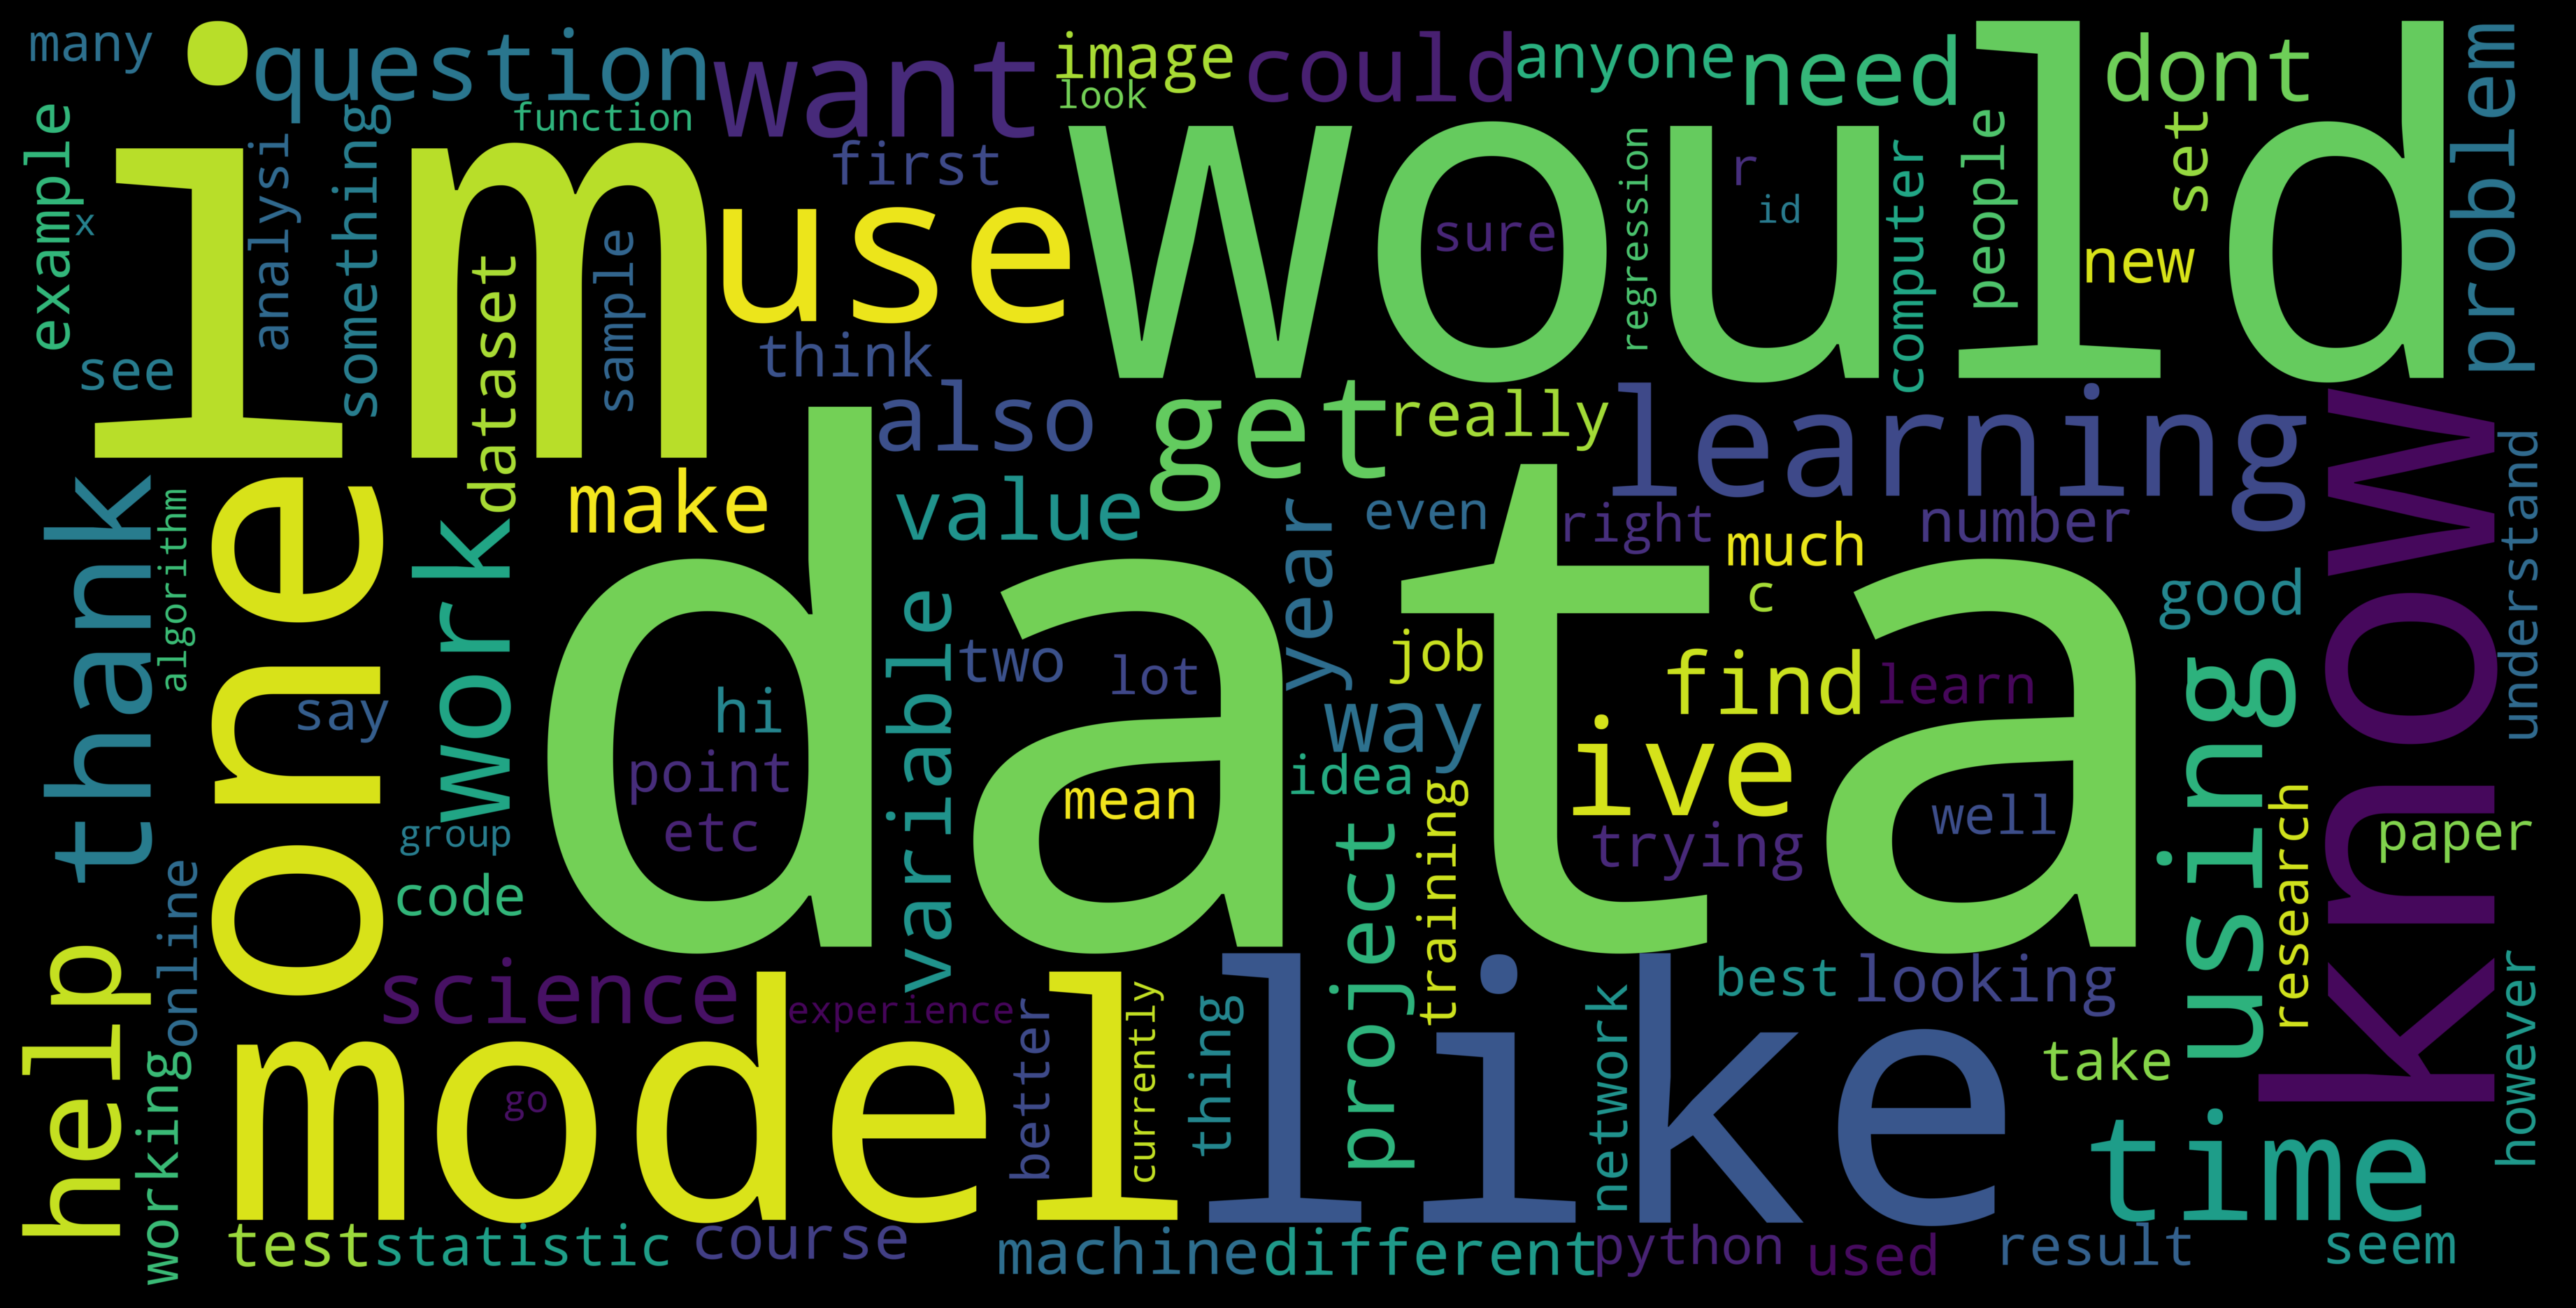

In [32]:
post_word_string = ' '.join(post_corpus)
show_wordcloud(post_word_string, stop)

**The deserved king of all posts is the word "data".**

In [33]:
# Data for bigrams
top_post_bigrams = get_top_ngram(post_cleaned, 2)[:10]
title_x, title_y = map(list, zip(*top_post_bigrams))

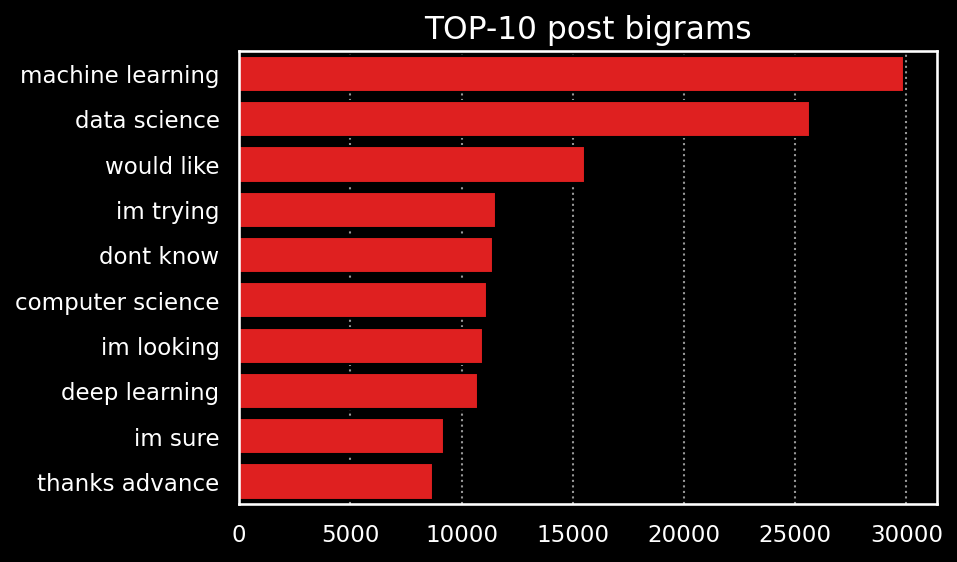

In [34]:
plt.title('TOP-10 post bigrams', color = 'white', size = 15)
sns.barplot(x = title_y, y = title_x, edgecolor = 'black', color = 'red')
plt.show()

In [35]:
# Data for bigrams
top_post_trigrams = get_top_ngram(post_cleaned, 3)[:10]
title_x, title_y = map(list, zip(*top_post_trigrams))

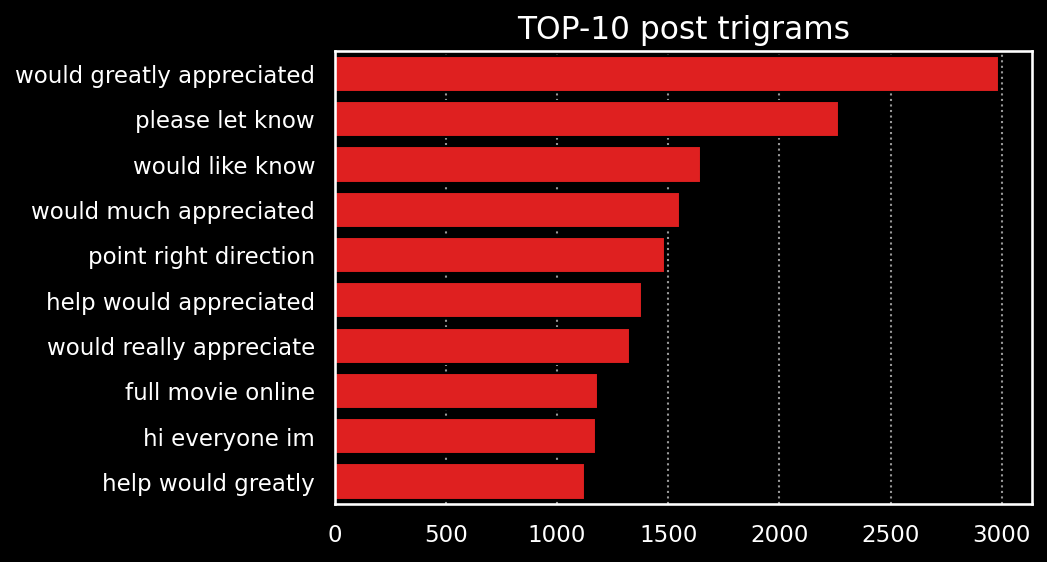

In [36]:
plt.title('TOP-10 post trigrams', color = 'white', size = 15)
sns.barplot(x = title_y, y = title_x, edgecolor = 'black', color = 'red')
plt.show()

<h1 style='color:white; background:black; border:0'><center>WORK IN PROGRESS...</center></h1>